In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

file_path = 'Data.xlsx' 
Base1 = pd.read_excel(file_path, sheet_name='Base 1')  
Base2 = pd.read_excel(file_path, sheet_name='Base 2')  
Base3 = pd.read_excel(file_path, sheet_name='Base 3')  
Base4 = pd.read_excel(file_path, sheet_name='Base 4')  
Katherine = pd.read_excel(file_path, sheet_name='Katherine')  
ClosedRing = pd.read_excel(file_path, sheet_name='ClosedRing')  




### Comparison of e- mobility for all molecules

/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/2480628308.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


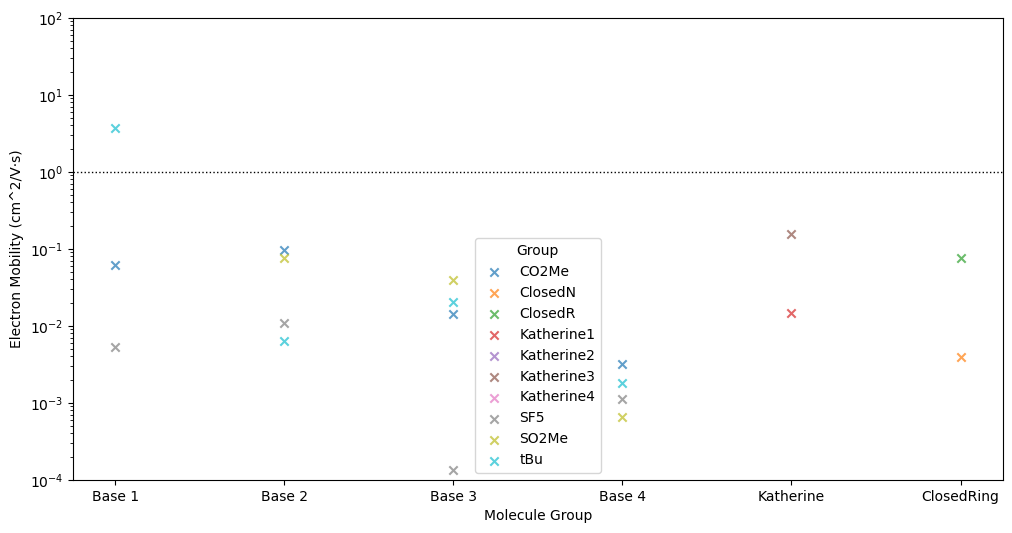

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['300K'], group_data['e- 𝜇 (cm^2/V·s)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Molecule Group')
ax1.set_ylabel('Electron Mobility (cm^2/V·s)')
ax1.set_ylim(10e-5, 10e1)
ax1.axhline(y=1, color='black', linestyle=':', linewidth=1)

legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()


/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/685931347.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


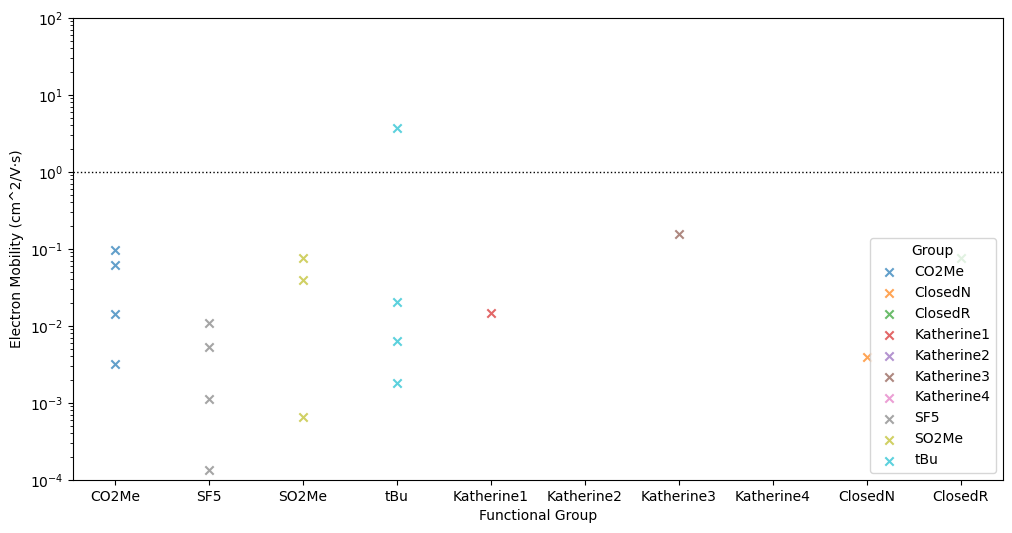

In [29]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['Molecule'], group_data['e- 𝜇 (cm^2/V·s)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Functional Group')
ax1.set_ylabel('Electron Mobility (cm^2/V·s)')
ax1.set_ylim(10e-5, 10e1)
ax1.axhline(y=1, color='black', linestyle=':', linewidth=1)

legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()


### Comparison of h+ mobility for all molecules

/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/1237100786.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


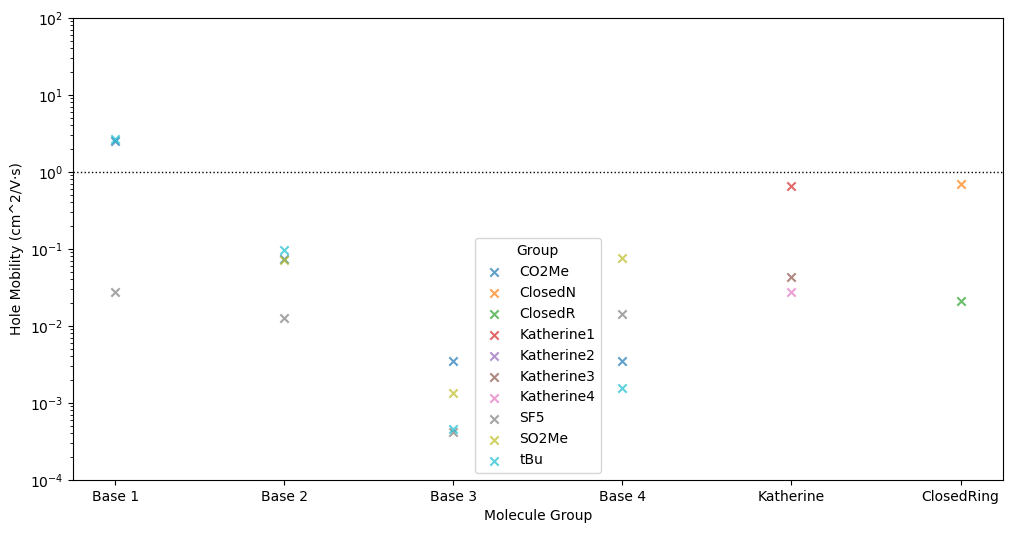

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['300K'], group_data['h+ 𝜇 (cm^2/V·s)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Molecule Group')
ax1.set_ylabel('Hole Mobility (cm^2/V·s)')
ax1.set_ylim(10e-5, 10e1)
ax1.axhline(y=1, color='black', linestyle=':', linewidth=1)

legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()


/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/564117933.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


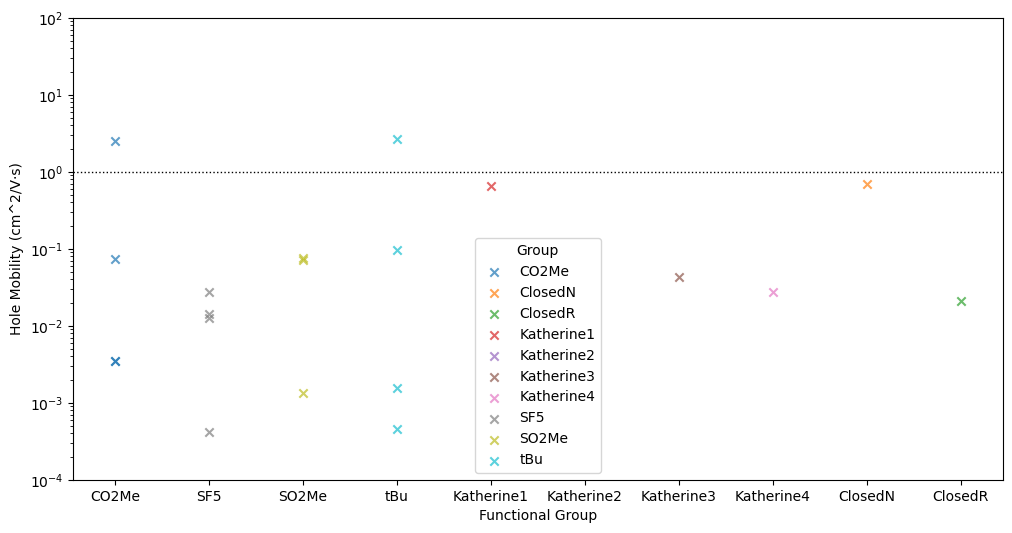

In [30]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['Molecule'], group_data['h+ 𝜇 (cm^2/V·s)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Functional Group')
ax1.set_ylabel('Hole Mobility (cm^2/V·s)')
ax1.set_ylim(10e-5, 10e1)
ax1.axhline(y=1, color='black', linestyle=':', linewidth=1)

legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()


### Comparison of e- J for all molecules

/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/917317488.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


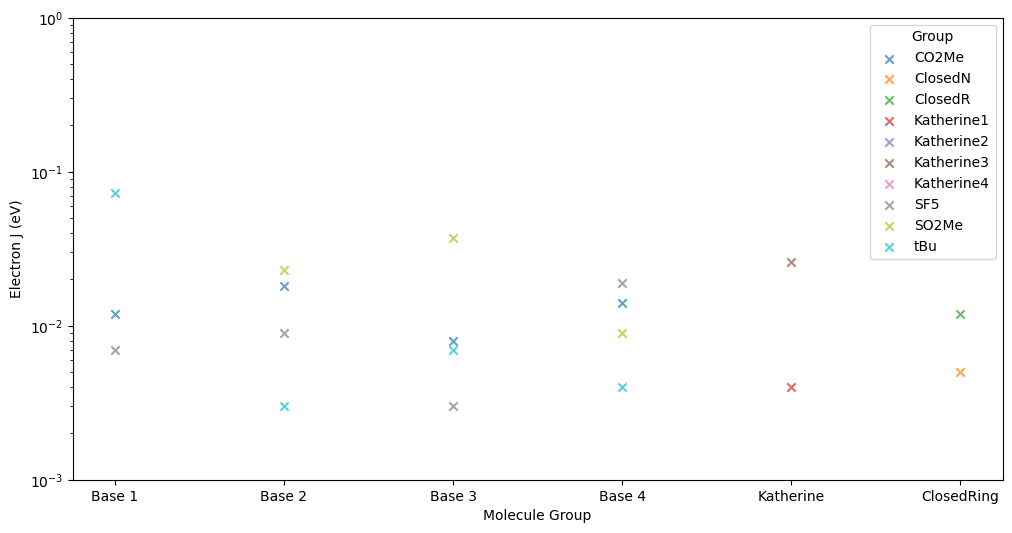

In [31]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['300K'], group_data['e- J (eV)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Molecule Group')
ax1.set_ylabel('Electron J (eV)')
ax1.set_ylim(10e-4, 10e-1)


legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()


/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/820728092.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


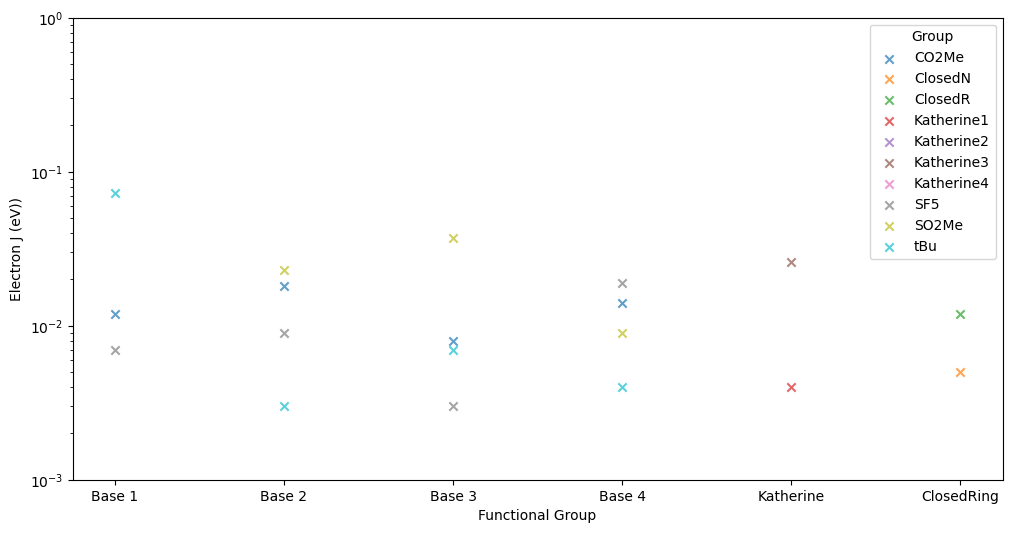

In [32]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['300K'], group_data['e- J (eV)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Functional Group')
ax1.set_ylabel('Electron J (eV))')
ax1.set_ylim(10e-4, 10e-1)


legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()


### Comparison of h+ J for all molecules

/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/2091834611.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


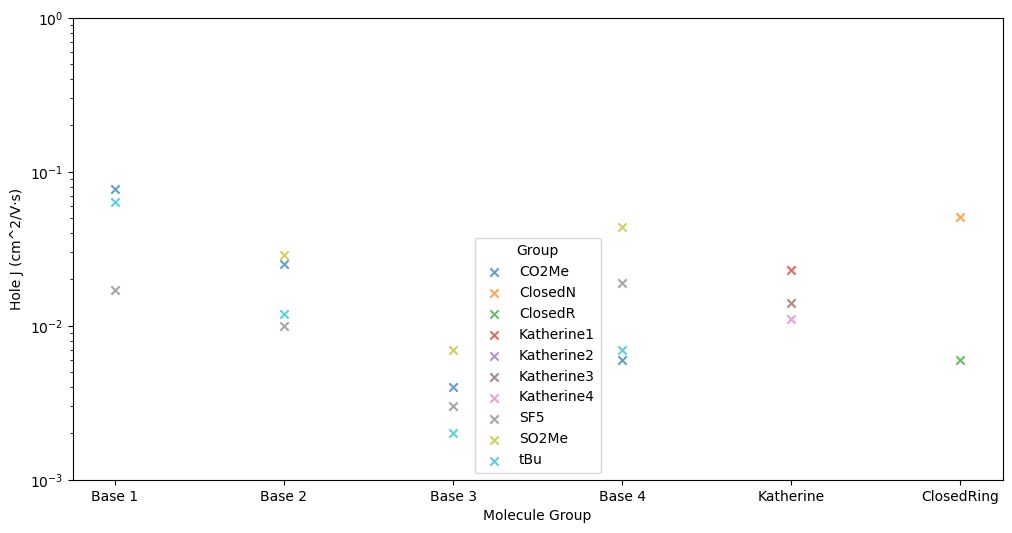

In [33]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['300K'], group_data['h+ J (eV)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Molecule Group')
ax1.set_ylabel('Hole J (cm^2/V·s)')
ax1.set_ylim(10e-4, 10e-1)


legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()


/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/1215205532.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


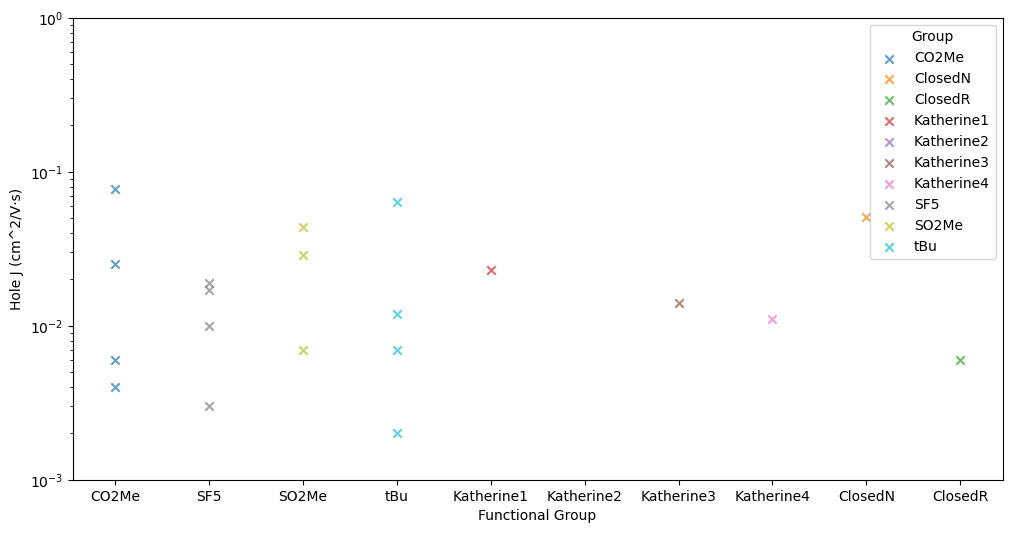

In [34]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['Molecule'], group_data['h+ J (eV)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Functional Group')
ax1.set_ylabel('Hole J (cm^2/V·s)')
ax1.set_ylim(10e-4, 10e-1)


legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()


### Comparison of e- lambda for all molecules

/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/2819635833.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


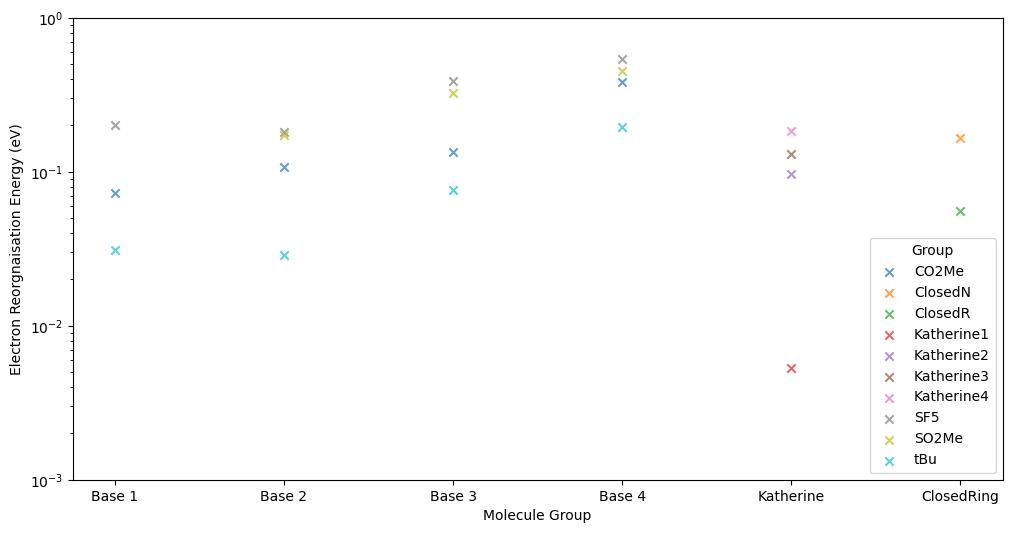

In [35]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['300K'], group_data['e- 𝜆 (eV)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Molecule Group')
ax1.set_ylabel('Electron Reorgnaisation Energy (eV)')
ax1.set_ylim(10e-4, 10e-1)


legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()


/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/340822635.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


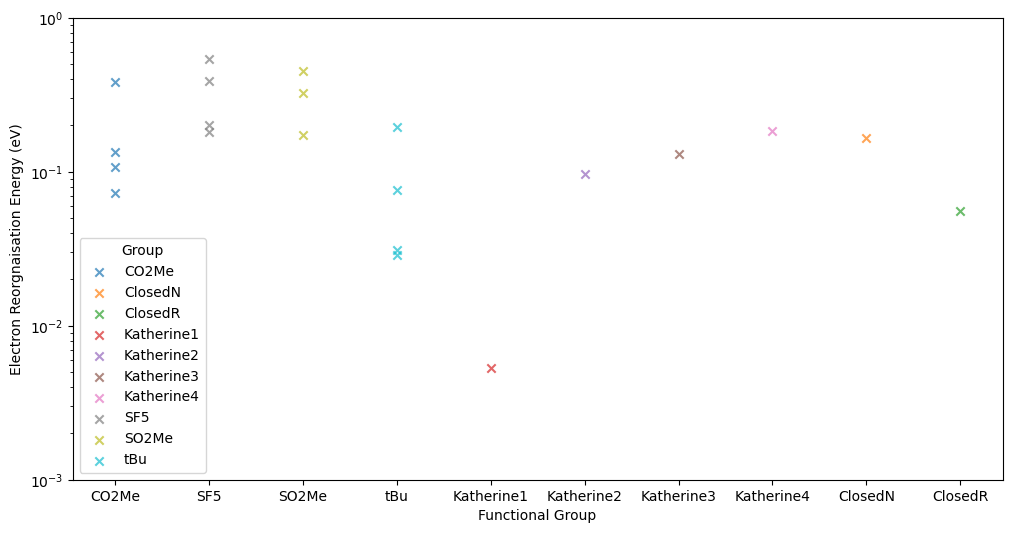

In [36]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['Molecule'], group_data['e- 𝜆 (eV)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Functional Group')
ax1.set_ylabel('Electron Reorgnaisation Energy (eV)')
ax1.set_ylim(10e-4, 10e-1)


legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()


### Comparison of h+ lambda for all molecules

/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/50010702.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


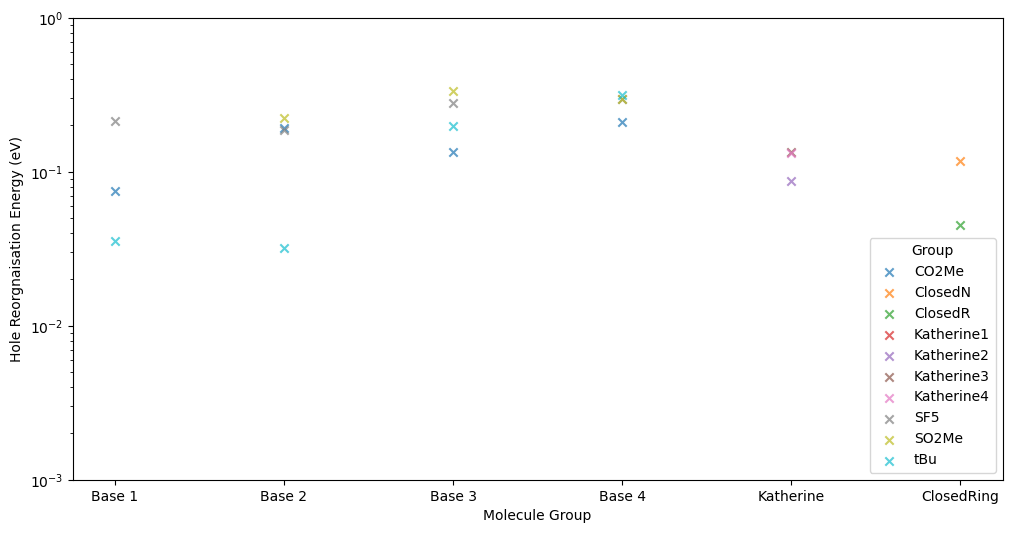

In [37]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['300K'], group_data['h+ 𝜆 (eV)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Molecule Group')
ax1.set_ylabel('Hole Reorgnaisation Energy (eV)')
ax1.set_ylim(10e-4, 10e-1)


legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()


/var/folders/2_/c3gs48z50d137n59njkyc0lr0000gs/T/ipykernel_1159/988301563.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(functional_groups))


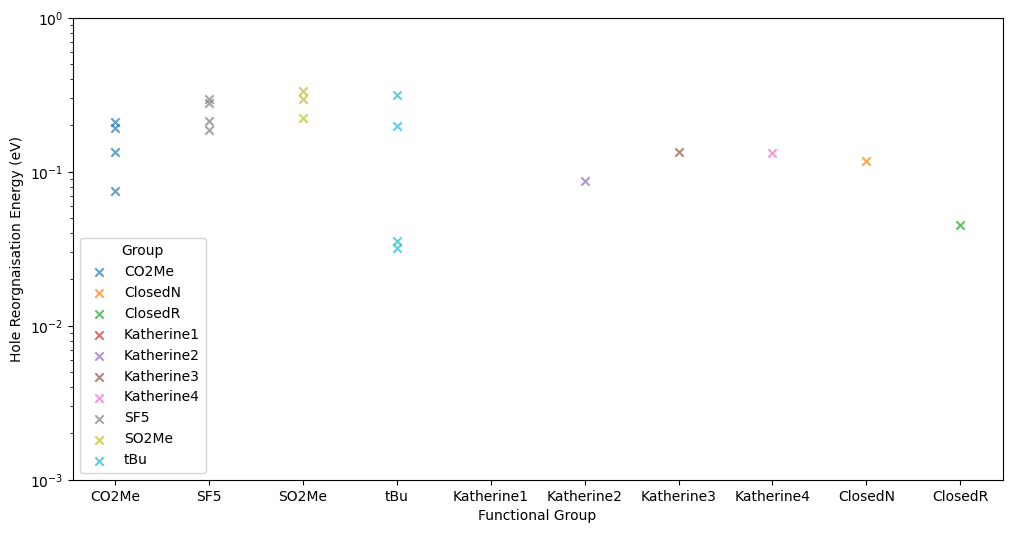

In [38]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

functional_groups = np.unique(np.concatenate([Base1['Molecule'], Base2['Molecule'], Base3['Molecule'], Base4['Molecule'], Katherine['Molecule'], ClosedRing['Molecule']]))

colors = plt.cm.get_cmap('tab10', len(functional_groups))  

group_color_map = {group: colors(i) for i, group in enumerate(functional_groups)}

for base_data, label in zip([Base1, Base2, Base3, Base4, Katherine, ClosedRing],
                            ['Base 1', 'Base 2', 'Base 3', 'Base 4', 'Katherine', 'Closed Ring']):

    for group in functional_groups:
    
        group_data = base_data[base_data['Molecule'] == group]

        ax1.scatter(group_data['Molecule'], group_data['h+ 𝜆 (eV)'], 
                    c=[group_color_map[group]], label=group if base_data is Base1 else "", marker='x', alpha=0.7)

ax1.set_yscale('log')
ax1.set_xlabel('Functional Group')
ax1.set_ylabel('Hole Reorgnaisation Energy (eV)')
ax1.set_ylim(10e-4, 10e-1)


legend_handles = []
for group, color in group_color_map.items():
    legend_handles.append(plt.Line2D([0], [0], marker='x', color='w', markerfacecolor=color, markersize=10, label=group))

ax1.legend(title='Group')

plt.show()
